In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import math

Dimensions : Largeur : 451 px, hauteur : 300 px  


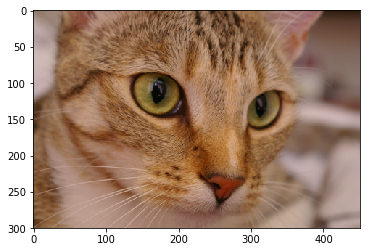

In [2]:
#chargement de l'image
image = cv2.imread('../chat.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Récupérer et afficher la taille de l'image (en pixels)
h = image.shape[0]
w = image.shape[1]
print("Dimensions : Largeur : {} px, hauteur : {} px  ".format(w, h))


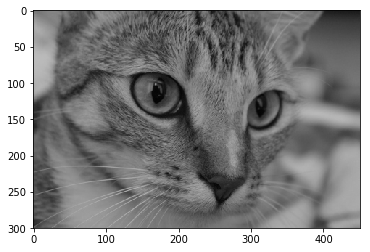

In [3]:
#Conversion en niveaux de gris
def rgb_to_gray(img):
        grayImage = np.zeros(img.shape)
        R = np.array(img[:, :, 0])
        G = np.array(img[:, :, 1])
        B = np.array(img[:, :, 2])

        R = (R *.299)
        G = (G *.587)
        B = (B *.114)

        Avg = (R+G+B)
        grayImage = img

        for i in range(3):
            grayImage[:,:,i] = Avg

        return grayImage

#Affichage
grayImage = rgb_to_gray(image)  
plt.imshow(grayImage)
plt.show()

In [4]:
# Fonction d'application du flou gaussian
def blur(image):
    blur = cv2.GaussianBlur(image, (5, 5), 0)    
    return blur


# Fonction d'application du scale(changement d'echelle)
def scale(image):
        #pourcentage du changement d'echelle
        scale_percent = 50

        # calcul des 50% des dimensions de l'image en entrée
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)

        # dsize
        dsize = (width, height)

        # resize image
        output = cv2.resize(image, dsize)
        return output


In [5]:
# ------------- 1/ CONSTRUCTION D'UN ESPACE D'ECHELLE -------------------------------------------------------------------------

#création de 4 octaves ou chaque octave contient 5 matrices 
O1=np.zeros((5,h,w,3) , dtype=np.uint8); 
O2=np.zeros((5,int(h/2),int(w/2),3) , dtype=np.uint8); 
O3=np.zeros((5,int(h/4),int(w/4),3) , dtype=np.uint8); 
O4=np.zeros((5,int(h/8),int(w/8),3) , dtype=np.uint8); 

#matrices de stockage des grayImage de scale different
grayImage1=np.zeros((h,w,3) , dtype=np.uint8); 
grayImage2=np.zeros((int(h/2),int(w/2),3) , dtype=np.uint8); 
grayImage3=np.zeros((int(h/4),int(w/4),3) , dtype=np.uint8); 
grayImage4=np.zeros((int(h/8),int(w/8),3) , dtype=np.uint8);


In [6]:
#on récupére l'image originale dans grayImage1
grayImage1=grayImage

"""nous allons prendre l'image d'origine et réduire l'échelle de moitié.
Pour chaque nouvelle image, nous allons créer des versions floues"""

for i in range(5):
    O1[i,:,:,:]=grayImage1[:,:,:]
    grayImage1= blur(grayImage1)
grayImage2=scale(grayImage1)
    
for i in range(5):
    O2[i,:,:,:]=grayImage2[:,:,:]
    grayImage2= blur(grayImage2)
grayImage3=scale(grayImage2)
    
for i in range(5):
    O3[i,:,:,:]=grayImage3[:,:,:]
    grayImage3= blur(grayImage3)
grayImage4=scale(grayImage3)
    
    
for i in range(5):
    O4[i,:,:,:]=grayImage4[:,:,:]
    grayImage4= blur(grayImage4)



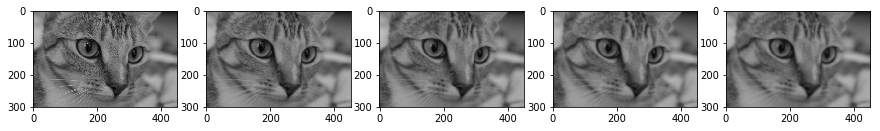

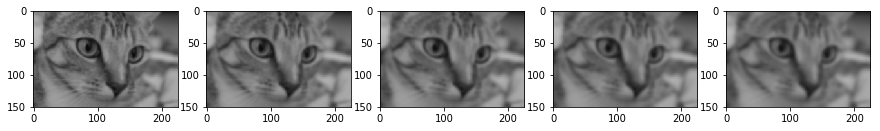

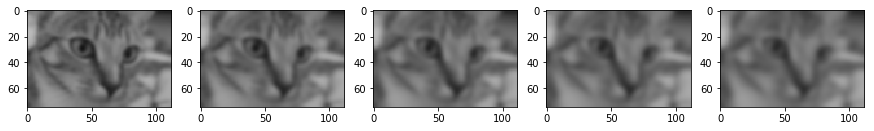

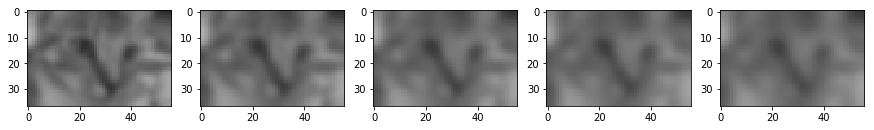

In [7]:
#Affichage des octaves
fig = plt.figure(figsize=(15,25)) 
for i in range(5):
    fig.add_subplot(1,5,i+1)
    plt.imshow(O1[i,:,:,:])
    
fig = plt.figure(figsize=(15,25)) 
for i in range(5):
    fig.add_subplot(1,5,i+1)
    plt.imshow(O2[i,:,:,:])
    
fig = plt.figure(figsize=(15,25)) 
for i in range(5):
    fig.add_subplot(1,5,i+1)
    plt.imshow(O3[i,:,:,:])
    
fig = plt.figure(figsize=(15,25)) 
for i in range(5):
    fig.add_subplot(1,5,i+1)
    plt.imshow(O4[i,:,:,:])
    


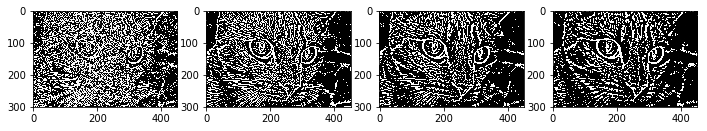

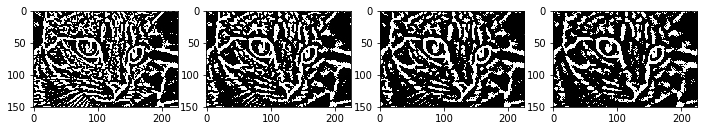

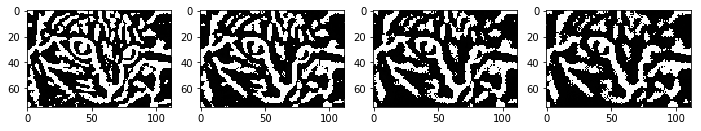

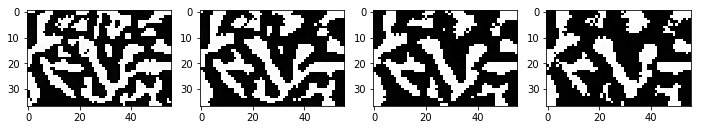

In [8]:
# DIFFERENCE DE GAUSSIEN
"""
Jusqu'à présent, nous avons créé des images à plusieurs échelles et utilisé un flou gaussien pour chacune d'elles afin de 
réduire le bruit dans l'image.
Nous tenterons ensuite d’améliorer les fonctionnalités à l’aide de Différence de Gaussiens ou DoG.

"""
#déclaration des matrices DoG
dog1=np.zeros((4,h,w,3) , dtype=np.uint8); 
dog2=np.zeros((4,int(h/2),int(w/2),3) , dtype=np.uint8); 
dog3=np.zeros((4,int(h/4),int(w/4),3) , dtype=np.uint8); 
dog4=np.zeros((4,int(h/8),int(w/8),3) , dtype=np.uint8); 


"""
Calcul de DoG, pour chaque octave,  on soustrait chaque image de l'image précédente à la même échelle.
"""
fig = plt.figure(figsize=(15,25)) 
for i in range(4):
    dog1[i,:,:,:]= O1[i,:,:,:] - O1[i+1,:,:,:]
    fig.add_subplot(1,5,i+1)
    plt.imshow(dog1[i,:,:,:])  
    
fig = plt.figure(figsize=(15,25)) 
for i in range(4):
    dog2[i,:,:,:]= O2[i,:,:,:] - O2[i+1,:,:,:]
    fig.add_subplot(1,5,i+1)
    plt.imshow(dog2[i,:,:,:])  

fig = plt.figure(figsize=(15,25)) 
for i in range(4):
    dog3[i,:,:,:]= O3[i,:,:,:] - O3[i+1,:,:,:]
    fig.add_subplot(1,5,i+1)
    plt.imshow(dog3[i,:,:,:])  
    
fig = plt.figure(figsize=(15,25)) 
for i in range(4):
    dog4[i,:,:,:]= O4[i,:,:,:] - O4[i+1,:,:,:]
    fig.add_subplot(1,5,i+1)
    plt.imshow(dog4[i,:,:,:])      

In [9]:
# ------------- 2/ LOCALISATION DES POINTS D'INTERET -------------------------------------------------------------------------
"""
Rechercher les points clés importants de l'image pouvant être utilisés pour la correspondance des caractéristiques ,au but
de trouver les maxima et minima locaux pour les images."""

""" declaration des matrices cles :
une matrice clesij est une matrice binaire , tel que i est l'indice de  DoG(sigma) , et j l'indice de l'image
dans le DoG i.
             cles[x,y]==1 : (x,y) est un point d'interet
             cles[x,y]==0 : (x,y) n'est pas un point d'interet 
"""
cles11=np.zeros((h,w) , dtype=np.uint8)
cles21=np.zeros((int(h/2),int(w/2)), dtype=np.uint8)
cles31=np.zeros((int(h/4),int(w/4)) , dtype=np.uint8)
cles41=np.zeros((int(h/8),int(w/8)) , dtype=np.uint8)


cles12=np.zeros((h,w) , dtype=np.uint8)
cles22=np.zeros((int(h/2),int(w/2)), dtype=np.uint8)
cles32=np.zeros((int(h/4),int(w/4)) , dtype=np.uint8)
cles42=np.zeros((int(h/8),int(w/8)) , dtype=np.uint8)

""" 
chaque valeur de pixel est comparée à 26 autres valeurs de pixel pour déterminer s'il s'agit des maxima / minima locaux.
"""
for i in range(1,3): 
    for x in range(1,h-1):
        for y in range(1,w-1): 
            if ((dog1[i,x,y,0] >= dog1[i,x-1:x+2,y-1:y+2,0]) & (dog1[i,x,y,0] >= dog1[i+1,x-1:x+2,y-1:y+2,0]) & 
                (dog1[i,x,y,0] >= dog1[i-1,x-1:x+2,y-1:y+2,0])).all():
                if(i==1):
                    cles11[x,y]=1
                else :
                    cles12[x,y]=1
                    
            elif ((dog1[i,x,y,0] <= dog1[i,x-1:x+2,y-1:y+2,0]) & (dog1[i,x,y,0] <= dog1[i+1,x-1:x+2,y-1:y+2,0]) & 
                (dog1[i,x,y,0] <= dog1[i-1,x-1:x+2,y-1:y+2,0])).all():
                if(i==1):
                    cles11[x,y]=1
                else :
                    cles12[x,y]=1
             
                            

for i in range(1,3): 
    for x in range(1,int(h/2)-1):
        for y in range(1,int(w/2)-1): 
            if ((dog2[i,x,y,0] >= dog2[i,x-1:x+2,y-1:y+2,0])& (dog2[i,x,y,0] >= dog2[i+1,x-1:x+2,y-1:y+2,0]) & 
                (dog2[i,x,y,0] >= dog2[i-1,x-1:x+2,y-1:y+2,0])).all():
                if(i==1):
                    cles21[x,y]=1
                else :
                    cles22[x,y]=1
                    
            elif((dog2[i,x,y,0] <= dog2[i,x-1:x+2,y-1:y+2,0])& (dog2[i,x,y,0] <= dog2[i+1,x-1:x+2,y-1:y+2,0]) & 
                (dog2[i,x,y,0] <= dog2[i-1,x-1:x+2,y-1:y+2,0])).all():
                if(i==1):
                    cles21[x,y]=1
                else :
                    cles22[x,y]=1
             
                
for i in range(1,3): 
    for x in range(1,int(h/4)-1):
        for y in range(1,int(w/4)-1): 
            if ((dog3[i,x,y,0] >= dog3[i,x-1:x+2,y-1:y+2,0]) & (dog3[i,x,y,0] >= dog3[i+1,x-1:x+2,y-1:y+2,0]) & 
                (dog3[i,x,y,0] >= dog3[i-1,x-1:x+2,y-1:y+2,0])).all():
                if(i==1):
                    cles31[x,y]=1
                else :
                    cles32[x,y]=1
                    
            elif ((dog3[i,x,y,0] <= dog3[i,x-1:x+2,y-1:y+2,0]) & (dog3[i,x,y,0] <= dog3[i+1,x-1:x+2,y-1:y+2,0]) & 
                (dog3[i,x,y,0] <= dog3[i-1,x-1:x+2,y-1:y+2,0])).all():
                if(i==1):
                    cles31[x,y]=1
                else :
                    cles32[x,y]=1
                
for i in range(1,3): 
    for x in range(1,int(h/8)-1):
        for y in range(1,int(w/8)-1): 
            if ((dog4[i,x,y,0] >= dog4[i,x-1:x+2,y-1:y+2,0]) & (dog4[i,x,y,0] >= dog4[i+1,x-1:x+2,y-1:y+2,0]) & 
                (dog4[i,x,y,0] >= dog4[i-1,x-1:x+2,y-1:y+2,0])).all():
                if(i==1):
                    cles41[x,y]=1
                else :
                    cles42[x,y]=1
                    
            elif ((dog4[i,x,y,0] <= dog4[i,x-1:x+2,y-1:y+2,0]) & (dog4[i,x,y,0] <= dog4[i+1,x-1:x+2,y-1:y+2,0]) & 
                (dog4[i,x,y,0] <= dog4[i-1,x-1:x+2,y-1:y+2,0])).all():
                if(i==1):
                    cles41[x,y]=1
                else :
                    cles42[x,y]=1

             
    

In [10]:
"""remplir les matrices des points d'interets , ou chaque point(x,y) est coloré en rouge s'il est un point d'interet ,
dans le cas contraire , on garde l'intensité de la premiere image de chaque octave(ça depend du scale)"""

point_interet11 = np.zeros((h,w,3) , dtype=np.uint8)  
point_interet12 = np.zeros((h,w,3) , dtype=np.uint8)  
for x in range(h):  
    for y in range(w): 
        if cles11[x,y]==0 :     
            point_interet11[x,y,0]=255
            point_interet11[x,y,1]=0
            point_interet11[x,y,2]=0
                
        else :
            point_interet11[x,y,0]=O1[0,x,y,0]
            point_interet11[x,y,1]=O1[0,x,y,0]
            point_interet11[x,y,2]=O1[0,x,y,0]
            
        if cles12[x,y]==0 :     
            point_interet12[x,y,0]=255
            point_interet12[x,y,1]=0
            point_interet12[x,y,2]=0
                
        else :
            point_interet12[x,y,0]=O1[0,x,y,0]
            point_interet12[x,y,1]=O1[0,x,y,0]
            point_interet12[x,y,2]=O1[0,x,y,0]
        

In [11]:
point_interet21 = np.zeros((int(h/2),int(w/2),3) , dtype=np.uint8)  
point_interet22 = np.zeros((int(h/2),int(w/2),3) , dtype=np.uint8)  
for x in range(int(h/2)):  
    for y in range(int(w/2)): 
        if cles21[x,y]==0 :     
            point_interet21[x,y,0]=255
            point_interet21[x,y,1]=0
            point_interet21[x,y,2]=0
                
        else :
            point_interet21[x,y,0]=O2[0,x,y,0]
            point_interet21[x,y,1]=O2[0,x,y,0]
            point_interet21[x,y,2]=O2[0,x,y,0]
            
             
        if cles22[x,y]==0 :     
            point_interet22[x,y,0]=255
            point_interet22[x,y,1]=0
            point_interet22[x,y,2]=0
                
        else :
            point_interet22[x,y,0]=O2[0,x,y,0]
            point_interet22[x,y,1]=O2[0,x,y,0]
            point_interet22[x,y,2]=O2[0,x,y,0]
            
#plt.imshow(point_interet2)

In [12]:
point_interet31 = np.zeros((int(h/4),int(w/4),3) , dtype=np.uint8)  
point_interet32 = np.zeros((int(h/4),int(w/4),3) , dtype=np.uint8)  
for x in range(int(h/4)):  
    for y in range(int(w/4)): 
        if cles31[x,y]==0 :     
            point_interet31[x,y,0]=255
            point_interet31[x,y,1]=0
            point_interet31[x,y,2]=0
                
        else :
            point_interet31[x,y,0]=O3[0,x,y,0]
            point_interet31[x,y,1]=O3[0,x,y,0]
            point_interet31[x,y,2]=O3[0,x,y,0]
            
            
        if cles32[x,y]==0 :     
            point_interet32[x,y,0]=255
            point_interet32[x,y,1]=0
            point_interet32[x,y,2]=0
                
        else :
            point_interet32[x,y,0]=O3[0,x,y,0]
            point_interet32[x,y,1]=O3[0,x,y,0]
            point_interet32[x,y,2]=O3[0,x,y,0]


In [13]:
point_interet41 = np.zeros((int(h/8),int(w/8),3) , dtype=np.uint8)  
point_interet42 = np.zeros((int(h/8),int(w/8),3) , dtype=np.uint8)  
for x in range(int(h/8)):  
    for y in range(int(w/8)): 
        if cles41[x,y]==0 :     
            point_interet41[x,y,0]=255
            point_interet41[x,y,1]=0
            point_interet41[x,y,2]=0
                
        else :
            point_interet41[x,y,0]=O4[0,x,y,0]
            point_interet41[x,y,1]=O4[0,x,y,0]
            point_interet41[x,y,2]=O4[0,x,y,0]
            
        if cles42[x,y]==0 :     
            point_interet42[x,y,0]=255
            point_interet42[x,y,1]=0
            point_interet42[x,y,2]=0
                
        else :
            point_interet42[x,y,0]=O4[0,x,y,0]
            point_interet42[x,y,1]=O4[0,x,y,0]
            point_interet42[x,y,2]=O4[0,x,y,0]
            


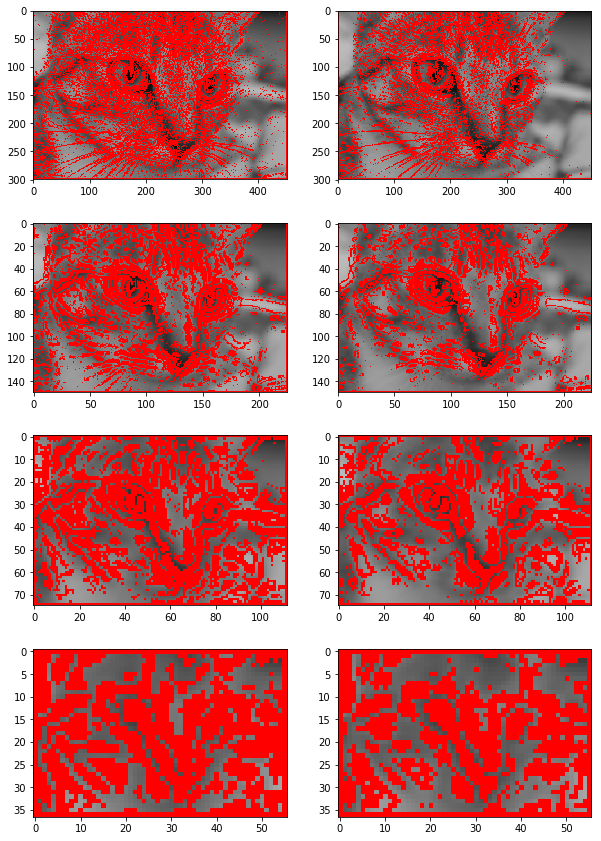

In [14]:

#affichage des points d'interet

fig1 = plt.figure(figsize=(10,15)) 

fig1.add_subplot(4,2,1)
plt.imshow(point_interet11)
fig1.add_subplot(4,2,2)
plt.imshow(point_interet12)

fig1.add_subplot(4,2,3)
plt.imshow(point_interet21)
fig1.add_subplot(4,2,4)
plt.imshow(point_interet22)

fig1.add_subplot(4,2,5)
plt.imshow(point_interet31)
fig1.add_subplot(4,2,6)
plt.imshow(point_interet32)

fig1.add_subplot(4,2,7)
plt.imshow(point_interet41)
fig1.add_subplot(4,2,8)
plt.imshow(point_interet42)


In [15]:
# ------------- 3/ SELECTION DES POINTS D'INTERET -------------------------------------------------------------------------

"""
élimination des points clés à faible contraste ou très proches du bord.
 1/devloppement de taylor d'ordre 2:
   dxi , dyi = dérivé premiere sur x(sur y respectivement) , i : indice du dog(sigma)
   dxxi , dyxi = dérivé seconde sur x(sur y respectivement) , i : indice du dog(sigma)
   dxyi = dérivé sur x et sur y, , i : indice du dog(sigma)
   tri = tr(H) trace de H , ou H : matrice hessien ,i : indice du dog(sigma)
   deti = det(H) determinant de H ,i : indice du dog(sigma)
   rapporti =tr(H)^2 / det(H)
"""

dx1=np.zeros((2,h,w,3) , dtype=np.uint8); 
dxx1=np.zeros((2,h,w,3) , dtype=np.uint8);
dx2=np.zeros((2,int(h/2),int(w/2),3) , dtype=np.uint8); 
dxx2=np.zeros((2,int(h/2),int(w/2),3) , dtype=np.uint8);
dx3=np.zeros((2,int(h/4),int(w/4),3) , dtype=np.uint8); 
dxx3=np.zeros((2,int(h/4),int(w/4),3) , dtype=np.uint8);
dx4=np.zeros((2,int(h/8),int(w/8),3) , dtype=np.uint8); 
dxx4=np.zeros((2,int(h/8),int(w/8),3) , dtype=np.uint8);


dyy1=np.zeros((2,h,w,3) , dtype=np.uint8);
dyy2=np.zeros((2,int(h/2),int(w/2),3) , dtype=np.uint8);
dyy3=np.zeros((2,int(h/4),int(w/4),3) , dtype=np.uint8);
dyy4=np.zeros((2,int(h/8),int(w/8),3) , dtype=np.uint8);


dxy1=np.zeros((2,h,w,3) , dtype=np.uint8);
dxy2=np.zeros((2,int(h/2),int(w/2),3) , dtype=np.uint8);
dxy3=np.zeros((2,int(h/4),int(w/4),3) , dtype=np.uint8);
dxy4=np.zeros((2,int(h/8),int(w/8),3) , dtype=np.uint8);

tr1=np.zeros((2,h,w,3) , dtype=np.uint8);
tr2=np.zeros((2,int(h/2),int(w/2),3) , dtype=np.uint8);
tr3=np.zeros((2,int(h/4),int(w/4),3) , dtype=np.uint8);
tr4=np.zeros((2,int(h/8),int(w/8),3) , dtype=np.uint8);


det1=np.zeros((2,h,w,3) , dtype=np.uint8);
det2=np.zeros((2,int(h/2),int(w/2),3) , dtype=np.uint8);
det3=np.zeros((2,int(h/4),int(w/4),3) , dtype=np.uint8);
det4=np.zeros((2,int(h/8),int(w/8),3) , dtype=np.uint8);


rapport1=np.zeros((2,h,w,3) , dtype=np.uint8);
rapport2=np.zeros((2,int(h/2),int(w/2),3) , dtype=np.uint8);
rapport3=np.zeros((2,int(h/4),int(w/4),3) , dtype=np.uint8);
rapport4=np.zeros((2,int(h/8),int(w/8),3) , dtype=np.uint8);


for i in range(2):
    for x in range(h-1):
        for y in range(w-1):
            #dog1prime[i,x,y,:]= (dog1[i+1,x+1,y,:] - dog1[i+1,x-1,y,:])/2
            dxx1[i,x,y,:]= (dog1[i+1,x+1,y,:] - 2* dog1[i+1,x,y,:] + dog1[i+1,x-1,y,:])
            dyy1[i,x,y,:]= (dog1[i+1,x,y+1,:] - 2* dog1[i+1,x,y,:] + dog1[i+1,x,y-1,:])
            dxy1[i,x,y,:]= (dog1[i+1,x+1,y+1,:] - dog1[i+1,x+1,y-1,:] - dog1[i+1,x-1,y+1,:]+ dog1[i+1,x-1,y-1,:])/4
            tr1[i,x,y,:] =  dxx1[i,x,y,:]+ dyy1[i,x,y,:]
            det1[i,x,y,:]= (dxx1[i,x,y,:]* dyy1[i,x,y,:]) - (dxy1[i,x,y,:]*dxy1[i,x,y,:])
            rapport1[i,x,y,:]= (tr1[i,x,y,:]*tr1[i,x,y,:])/ det1[i,x,y,:]
                        

            
            
for i in range(2):
    for x in range(int(h/2)-1):
        for y in range(int(w/2)-1):
            #dog2prime[i,x,y,:]= (dog2[i+1,x+1,y,:] - dog2[i+1,x-1,y,:])/2
            dxx2[i,x,y,:]= (dog2[i+1,x+1,y,:] - 2* dog2[i+1,x,y,:] + dog2[i+1,x-1,y,:])
            dyy2[i,x,y,:]= (dog2[i+1,x,y+1,:] - 2* dog2[i+1,x,y,:] + dog2[i+1,x,y-1,:])
            dxy2[i,x,y,:]= (dog2[i+1,x+1,y+1,:] - dog2[i+1,x+1,y-1,:] - dog2[i+1,x-1,y+1,:]+ dog2[i+1,x-1,y-1,:])/4
            tr2[i,x,y,:] =  dxx2[i,x,y,:]+ dyy2[i,x,y,:]
            det2[i,x,y,:]= (dxx2[i,x,y,:]* dyy2[i,x,y,:]) - (dxy2[i,x,y,:]*dxy2[i,x,y,:])
            rapport2[i,x,y,:]= (tr2[i,x,y,:]*tr2[i,x,y,:])/ det2[i,x,y,:]
            
for i in range(2):
    for x in range(int(h/4)-1):
        for y in range(int(w/4)-1):
            #dog3prime[i,x,y,:]= (dog3[i+1,x+1,y,:] - dog3[i+1,x-1,y,:])/2
            dxx3[i,x,y,:]= (dog3[i+1,x+1,y,:] - 2* dog3[i+1,x,y,:] + dog3[i+1,x-1,y,:])
            dyy3[i,x,y,:]= (dog3[i+1,x,y+1,:] - 2* dog3[i+1,x,y,:] + dog3[i+1,x,y-1,:])
            dxy3[i,x,y,:]= (dog3[i+1,x+1,y+1,:] - dog3[i+1,x+1,y-1,:] - dog3[i+1,x-1,y+1,:]+ dog3[i+1,x-1,y-1,:])/4
            tr3[i,x,y,:] =  dxx3[i,x,y,:]+ dyy3[i,x,y,:]
            det3[i,x,y,:]= (dxx3[i,x,y,:]* dyy3[i,x,y,:]) - (dxy3[i,x,y,:]*dxy3[i,x,y,:])
            rapport3[i,x,y,:]= (tr3[i,x,y,:]*tr3[i,x,y,:])/ det3[i,x,y,:]
            
for i in range(2):
    for x in range(int(h/8)-1):
        for y in range(int(w/8)-1):
            #dog4prime[i,x,y,:]= (dog4[i+1,x+1,y,:] - dog4[i+1,x-1,y,:])/2
            dxx4[i,x,y,:]= (dog4[i+1,x+1,y,:] - 2* dog4[i+1,x,y,:] + dog4[i+1,x-1,y,:])
            dyy4[i,x,y,:]= (dog4[i+1,x,y+1,:] - 2* dog4[i+1,x,y,:] + dog4[i+1,x,y-1,:])
            dxy4[i,x,y,:]= (dog4[i+1,x+1,y+1,:] - dog4[i+1,x+1,y-1,:] - dog4[i+1,x-1,y+1,:]+ dog4[i+1,x-1,y-1,:])/4
            tr4[i,x,y,:] =  dxx4[i,x,y,:]+ dyy4[i,x,y,:]
            det4[i,x,y,:]= (dxx4[i,x,y,:]* dyy4[i,x,y,:]) - (dxy4[i,x,y,:]*dxy4[i,x,y,:])
            rapport4[i,x,y,:]= (tr4[i,x,y,:]*tr4[i,x,y,:])/ det4[i,x,y,:]



C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide
C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in true_divide
C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: invalid value encount

In [16]:
#elimination des points d'interets ayant (dxx <0.03):point ayant un faible contraste ou ((tr(h)^2/det(h)) <12.1):point de bord

for i in range(2):
    for x in range(1,h-1):  
        for y in range(1,w-1): 
            if i==0 :
                if cles11[x,y]==0 :
                    if (dxx1[i,x,y,0] < 0.03) or (rapport1[i,x,y,0] > 12.1) :
                        cles11[x,y] = 1
                        point_interet11[x,y,0]=O1[0,x,y,0]
                        point_interet11[x,y,1]=O1[0,x,y,0]
                        point_interet11[x,y,2]=O1[0,x,y,0]
                        
                  
            else :
                if cles12[x,y]==0 :
                    if  (dxx1[i,x,y,0] < 0.03) or (rapport1[i,x,y,0] > 12.1):
                        cles12[x,y] = 1
                        point_interet12[x,y,0]=O1[0,x,y,0]
                        point_interet12[x,y,1]=O1[0,x,y,0]
                        point_interet12[x,y,2]=O1[0,x,y,0]
                        
        
for i in range(2):
    for x in range(1,int(h/2)-1):  
        for y in range(1,int(w/2)-1): 
             if i==0 :
                if cles21[x,y]==0 :
                    if (dxx2[i,x,y,0] < 0.03) or (rapport2[i,x,y,0] > 12.1):
                        cles21[x,y] = 1
                        point_interet21[x,y,0]=O2[0,x,y,0]
                        point_interet21[x,y,1]=O2[0,x,y,0]
                        point_interet21[x,y,2]=O2[0,x,y,0]
            
             else :
                if cles22[x,y]==0 :
                    if (dxx2[i,x,y,0] < 0.03) or (rapport2[i,x,y,0] > 12.1):
                        cles22[x,y] = 1
                        point_interet22[x,y,0]=O2[0,x,y,0]
                        point_interet22[x,y,1]=O2[0,x,y,0]
                        point_interet22[x,y,2]=O2[0,x,y,0]                 
 
  
for i in range(2):
    for x in range(1,int(h/4)-1):  
        for y in range(1,int(w/4)-1): 
             if i==0 :
                if cles31[x,y]==0 :
                    if (dxx3[i,x,y,0] < 0.03) or (rapport3[i,x,y,0] > 12.1):
                        cles31[x,y] = 1
                        point_interet31[x,y,0]=O3[0,x,y,0]
                        point_interet31[x,y,1]=O3[0,x,y,0]
                        point_interet31[x,y,2]=O3[0,x,y,0]
            
             else :
                if cles32[x,y]==0 :
                    if (dxx3[i,x,y,0] < 0.03) or (rapport3[i,x,y,0] > 12.1):
                        cles32[x,y] = 1
                        point_interet32[x,y,0]=O3[0,x,y,0]
                        point_interet32[x,y,1]=O3[0,x,y,0]
                        point_interet32[x,y,2]=O3[0,x,y,0]                 
                    
                    
for i in range(2):
    for x in range(1,int(h/8)-1):  
        for y in range(1,int(w/8)-1): 
             if i==0 :
                if cles41[x,y]==0 :
                    if (dxx4[i,x,y,0] < 0.03) or (rapport4[i,x,y,0] > 12.1):
                        cles41[x,y] = 1
                        point_interet41[x,y,0]=O4[0,x,y,0]
                        point_interet41[x,y,1]=O4[0,x,y,0]
                        point_interet41[x,y,2]=O4[0,x,y,0]
            
             else :
                if cles42[x,y]==0 :
                    if (dxx4[i,x,y,0] < 0.03) or (rapport4[i,x,y,0] > 12.1):
                        cles42[x,y] = 1
                        point_interet42[x,y,0]=O4[0,x,y,0]
                        point_interet42[x,y,1]=O4[0,x,y,0]
                        point_interet42[x,y,2]=O4[0,x,y,0]                 
                    

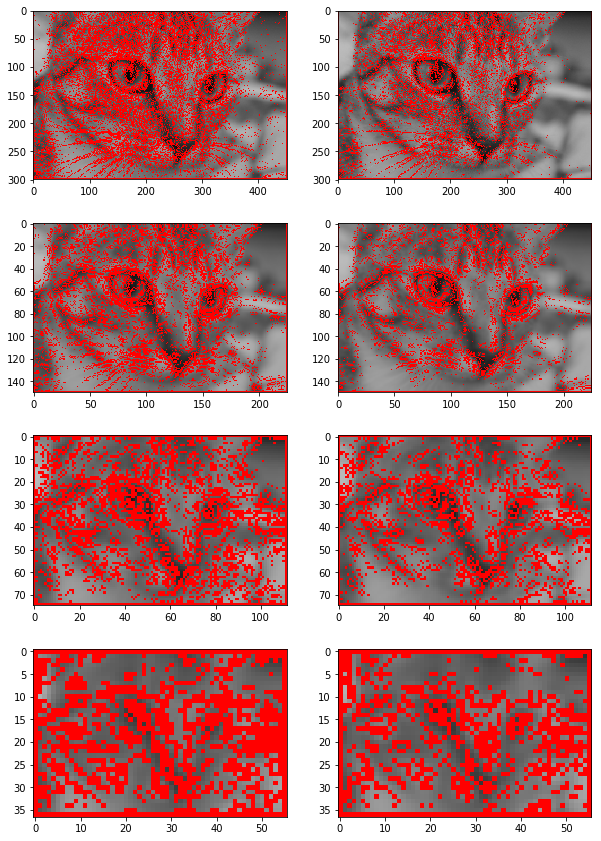

In [17]:
#affichage du resultat final aprés la selection des points

fig1 = plt.figure(figsize=(10,15)) 

fig1.add_subplot(4,2,1)
plt.imshow(point_interet11)
fig1.add_subplot(4,2,2)
plt.imshow(point_interet12)

fig1.add_subplot(4,2,3)
plt.imshow(point_interet21)
fig1.add_subplot(4,2,4)
plt.imshow(point_interet22)

fig1.add_subplot(4,2,5)
plt.imshow(point_interet31)
fig1.add_subplot(4,2,6)
plt.imshow(point_interet32)

fig1.add_subplot(4,2,7)
plt.imshow(point_interet41)
fig1.add_subplot(4,2,8)
plt.imshow(point_interet42)




In [18]:
# ------------- 4/ CALCUL DE L'ORIENTATION -------------------------------------------------------------------------

"""
calcul du GRADIENT : Gx , Gy , de l'amplitude , et de l'orientation des points d'interets
"""

Gx1=np.zeros((h,w) , dtype=np.uint8)
Gx2=np.zeros((int(h/2),int(w/2)) , dtype=np.uint8)
Gx3=np.zeros((int(h/4),int(w/4)) , dtype=np.uint8)
Gx4=np.zeros((int(h/8),int(w/8)) , dtype=np.uint8)

Gy1=np.zeros((h,w) , dtype=np.uint8)
Gy2=np.zeros((int(h/2),int(w/2)) , dtype=np.uint8)
Gy3=np.zeros((int(h/4),int(w/4)) , dtype=np.uint8)
Gy4=np.zeros((int(h/8),int(w/8)) , dtype=np.uint8)


amp1=np.zeros((h,w) , dtype=np.uint8)
amp2=np.zeros((int(h/2),int(w/2)) , dtype=np.uint8)
amp3=np.zeros((int(h/4),int(w/4)) , dtype=np.uint8)
amp4=np.zeros((int(h/8),int(w/8)) , dtype=np.uint8)

ori1=np.zeros((h,w) , dtype=np.float)
ori2=np.zeros((int(h/2),int(w/2)) , dtype=np.float)
ori3=np.zeros((int(h/4),int(w/4)) , dtype=np.float)
ori4=np.zeros((int(h/8),int(w/8)) , dtype=np.float)

for x in range(1,h-1):  
    for y in range(w-1): 
        if cles11[x,y]==0 :     
            Gx1[x,y]= O1[0,x+1,y,0]-O1[0,x-1,y,0]
            Gy1[x,y]= O1[0,x,y+1,0]-O1[0,x,y-1,0]
            amp1[x,y]=np.sqrt((Gx1[x,y] **2)+(Gy1[x,y]**2))
            ori1[x,y]=math.degrees(np.arctan(Gy1[x,y]/Gx1[x,y]))
            
        else :
            Gx1[x,y]=-1
            Gy1[x,y]=-1
            amp1[x,y]=-1
            ori1[x,y]=-1
for x in range(1,int(h/2)-1):  
    for y in range(int(w/2)-1): 
        if cles21[x,y]==0 :     
            Gx2[x,y]= O2[0,x+1,y,0]-O2[0,x-1,y,0]
            Gy2[x,y]= O2[0,x,y+1,0]-O2[0,x,y-1,0]
            amp2[x,y]=np.sqrt((Gx2[x,y] **2)+(Gy2[x,y]**2))
            ori2[x,y]=math.degrees(np.arctan(Gy2[x,y]/Gx2[x,y]))
            
        else :
            Gx2[x,y]=-1
            Gy2[x,y]=-1
            amp2[x,y]=-1
            ori2[x,y]=-1
            
for x in range(1,int(h/4)-1):  
    for y in range(int(w/4)-1): 
        if cles31[x,y]==0 :     
            Gx3[x,y]= O3[0,x+1,y,0]-O3[0,x-1,y,0]
            Gy3[x,y]= O3[0,x,y+1,0]-O3[0,x,y-1,0]
            amp3[x,y]=np.sqrt((Gx3[x,y] **2)+(Gy3[x,y]**2))
            ori3[x,y]=math.degrees(np.arctan(Gy3[x,y]/Gx3[x,y]))
            
        else :
            Gx3[x,y]=-1
            Gy3[x,y]=-1
            amp3[x,y]=-1
            ori3[x,y]=-1
            
for x in range(1,int(h/8)-1):  
    for y in range(int(w/8)-1): 
        if cles41[x,y]==0 :     
            Gx4[x,y]= O4[0,x+1,y,0]-O4[0,x-1,y,0]
            Gy4[x,y]= O4[0,x,y+1,0]-O4[0,x,y-1,0]
            amp4[x,y]=np.sqrt((Gx4[x,y] **2)+(Gy4[x,y]**2))
            ori4[x,y]=math.degrees(np.arctan(Gy4[x,y]/Gx4[x,y]))
            
        else :
            Gx4[x,y]=-1
            Gy4[x,y]=-1
            amp4[x,y]=-1
            ori4[x,y]=-1
                 
                
            


C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in ubyte_scalars
C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in ubyte_scalars
C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in ubyte_scalars
C:\Users\mica15\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in 